# Case Study on Correlation and Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\USER\\Downloads\\Add_sales_data_2018.csv')
df

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [4]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [5]:
df.shape

(205, 7)

In [6]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

# Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

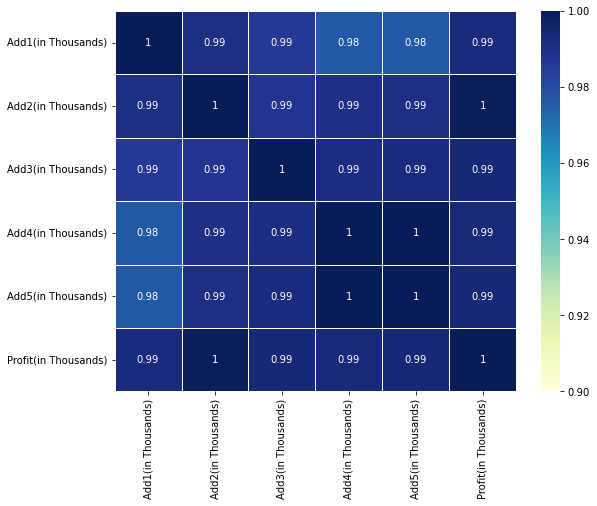

In [7]:
corrmatrix = df.corr()
plt.subplots(figsize=(9,7))
sns.heatmap(corrmatrix,vmin=.9,vmax=1,annot=True,linewidth=.5,cmap='YlGnBu')

In [8]:
#The amount spent for advertising through five different companies have high correlation with profit. Profit will increase as you increase the amount of money spent for advertising.

# Build a regression model to predict the profit from the given data and comment your findings on it.

In [10]:
X = df[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']]
y = df['Profit(in Thousands)']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)

In [13]:
model = lin_reg.fit(X_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [14]:
pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error as MSE
print('MSE value :',MSE(y_test,pred))

MSE value : 4.64028148505357e-25


In [16]:
#Feature dropping will increase the error

In [17]:
from sklearn.metrics import r2_score as r2
print(r2(y_test,pred))

1.0


In [18]:
#Mse value is close to zero. (So close to actual value)
#The model is fairly accurate at predicting future outcome of profit based on money spent in advertising
#The R-squared value is '1' implies that regression predictions perfectly fit the data.

# Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
Add1(in Thousands) 290     
Add2(in Thousands) 312    
Add3(in Thousands) 309    
Add4(in Thousands) 298    
Add5(in Thousands) 32

In [29]:
d ={ 'Add1(in Thousands)' :[290],
     'Add2(in Thousands)' :[312], 
     'Add3(in Thousands)' :[309],
     'Add4(in Thousands)' :[298],
     'Add5(in Thousands)' :[320] 
   }

df = pd.DataFrame.from_dict(d)
df

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [30]:
new_pred = model.predict(df)
print(new_pred)

[5820.06]


In [31]:
#Based on the model the predicted profit for given ad budget is: 5820.06